In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Dropout

# 1. Start to build DL from scratch

Follow by image below:

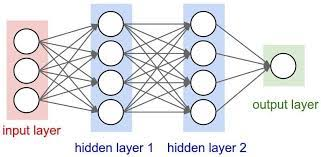

In [27]:
def create_model(input_shape: tuple, output_shape: int) -> Model:
  input = Input(shape = input_shape)
  x = Dense(units = 4, activation = "relu")(input)
  x = Dense(units = 4, activation = "relu")(x)
  output = Dense(units = output_shape, activation = "sigmoid")(x)
  return Model(input, output)

In [4]:
model = create_model((3, ), 1)

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense (Dense)               (None, 4)                 16        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#2. DL for structure data

## 2.1. Download data

In [6]:
!git clone https://github.com/DatacollectorVN/Advance-For-Heath-Care.git

Cloning into 'Advance-For-Heath-Care'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 21 (delta 5), reused 16 (delta 3), pack-reused 0
Receiving objects: 100% (21/21), 34.38 KiB | 1.32 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [7]:
!ls

Advance-For-Heath-Care	sample_data


In [11]:
!ls Advance-For-Heath-Care/lab1-2

download_data.py  first_ml_project.ipynb  README.md  requirements.txt


In [12]:
%cd 'Advance-For-Heath-Care/lab1-2'

/content/Advance-For-Heath-Care/lab1-2


In [14]:
!python download_data.py --data_type diabetes

Start to download, this process take a few minutes
Downloaded dataset - https://github.com/DatacollectorVN/Frameworks-Machine-Learning/releases/download/7/diabetes.csv to- './dataset/diabetes.csv'


## 2.2. Load data

In [16]:
ANNOTATIONS_CSV = os.path.join("dataset", "diabetes.csv")

In [17]:
df = pd.read_csv(ANNOTATIONS_CSV)

In [18]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 2.3. Train / Test Split

In [19]:
TARGET_COL = 'Outcome'

In [20]:
X = df[df.columns.drop(TARGET_COL)].values
y = df[[TARGET_COL]].values

In [21]:
VAL_RATIO = 0.2
SEED = 42

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = VAL_RATIO, random_state = SEED)

## 2.4. Create Model

In [23]:
def create_model(input_shape: tuple, output_shape: tuple) -> Model:
  input = Input(shape = input_shape)
  x = Dense(units = 64, activation = "relu")(input)
  x = Dense(units = 128, activation = "relu")(x)
  x = Dense(units = 64, activation = "relu")(x)
  output = Dense(units = output_shape, activation = "sigmoid")(x) # Why use sigmoid
  return Model(input, output)

### How to define input_shape

In [25]:
X_train.shape

(614, 8)

read [here](https://www.tensorflow.org/api_docs/python/tf/keras/Input)

In [26]:
input_shape = (8, )

In [28]:
output_shape = 1

In [37]:
model = create_model(input_shape, output_shape)

In [38]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
              metrics = ['accuracy']
)

In [39]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense_9 (Dense)             (None, 4)                 36        
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 61 (244.00 Byte)
Trainable params: 61 (244.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
history = model.fit(X_train, y_train,
                    epochs = 50,
                    batch_size = 16,
                    validation_data = (X_val, y_val)
)

Epoch 1/50
39/39 [==============================] - 1s 5ms/step - loss: 11.9024 - accuracy: 0.5358 - val_loss: 10.2325 - val_accuracy: 0.4870
Epoch 2/50
39/39 [==============================] - 0s 2ms/step - loss: 5.6456 - accuracy: 0.5228 - val_loss: 2.4728 - val_accuracy: 0.4091
Epoch 3/50
39/39 [==============================] - 0s 2ms/step - loss: 1.9558 - accuracy: 0.4251 - val_loss: 1.4397 - val_accuracy: 0.4091
Epoch 4/50
39/39 [==============================] - 0s 2ms/step - loss: 1.4113 - accuracy: 0.5358 - val_loss: 1.1342 - val_accuracy: 0.5974
Epoch 5/50
39/39 [==============================] - 0s 2ms/step - loss: 1.2172 - accuracy: 0.5977 - val_loss: 0.9733 - val_accuracy: 0.6558
Epoch 6/50
39/39 [==============================] - 0s 2ms/step - loss: 1.0880 - accuracy: 0.6221 - val_loss: 0.9697 - val_accuracy: 0.6688
Epoch 7/50
39/39 [==============================] - 0s 2ms/step - loss: 1.0460 - accuracy: 0.6254 - val_loss: 0.9122 - val_accuracy: 0.6623
Epoch 8/50
39/39 [

### Show train set

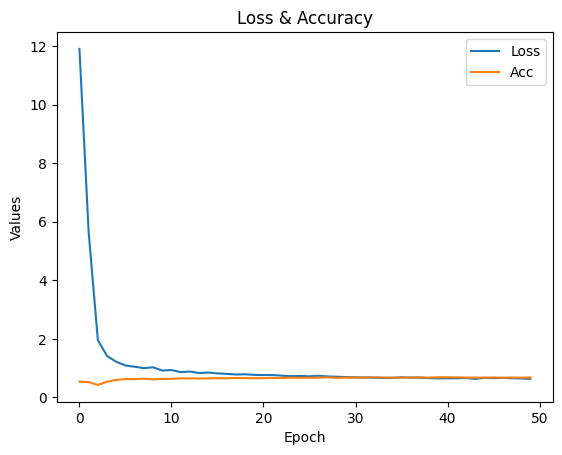

In [43]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Loss & Accuracy')
plt.ylabel('Values')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Acc'])
plt.show()

### Show validating set

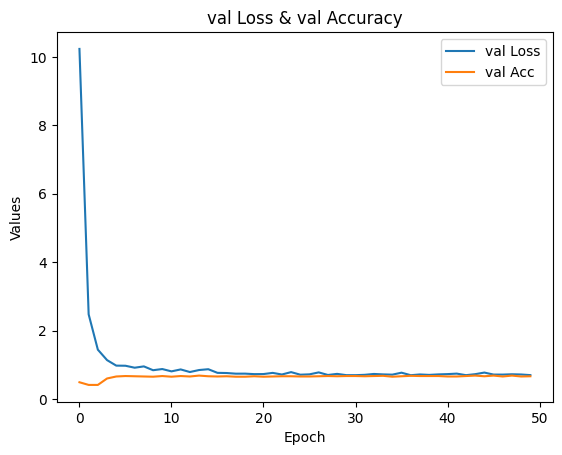

In [44]:
plt.figure()
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.title('val Loss & val Accuracy')
plt.ylabel('Values')
plt.xlabel('Epoch')
plt.legend(['val Loss', 'val Acc'])
plt.show()

### Show acc train and test

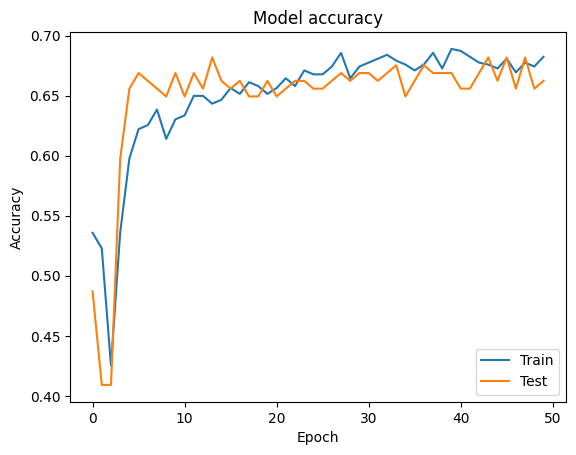

In [45]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

### If have overfitting

Simple way is dropout

In [46]:
def create_model_with_dropout(input_shape, output_shape):
  input = Input(shape = input_shape)
  x = Dense(units = 32, activation = "relu")(input)
  x = Dropout(rate = 0.1, seed = 1)(x)
  x = Dense(units = 64, activation = "relu")(x)
  x = Dropout(rate = 0.1, seed = 2)(x)
  x = Dense(units = 32, activation = "relu")(x)
  x = Dropout(rate = 0.1, seed = 3)(x)
  output = Dense(units = 1, activation = "sigmoid")(x)
  return Model(input, output)

### Create check point model

In [47]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [48]:
callback = ModelCheckpoint(filepath = "best_model.h5", monitor = 'val_accuracy', mode = 'max',
              save_best_only = True, verbose  = 1
)

In [49]:
model = create_model(input_shape, output_shape)
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

In [51]:
history = model.fit(X_train, y_train,
                    epochs = 50,
                    batch_size = 16,
                    validation_data = (X_val, y_val),
                    callbacks = callback)

Epoch 1/50
22/39 [===============>..............] - ETA: 0s - loss: 0.7183 - accuracy: 0.6250 
Epoch 1: val_accuracy improved from -inf to 0.63636, saving model to best_model.h5
39/39 [==============================] - 1s 6ms/step - loss: 0.7101 - accuracy: 0.6384 - val_loss: 0.6896 - val_accuracy: 0.6364
Epoch 2/50
 1/39 [..............................] - ETA: 0s - loss: 0.6952 - accuracy: 0.4375
Epoch 2: val_accuracy improved from 0.63636 to 0.64286, saving model to best_model.h5
39/39 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.6450 - val_loss: 0.6854 - val_accuracy: 0.6429
Epoch 3/50
 1/39 [..............................] - ETA: 0s - loss: 0.6829 - accuracy: 0.6875

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_accuracy did not improve from 0.64286
39/39 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.6450 - val_loss: 0.6819 - val_accuracy: 0.6429
Epoch 4/50
 1/39 [..............................] - ETA: 0s - loss: 0.6887 - accuracy: 0.5625
Epoch 4: val_accuracy did not improve from 0.64286
39/39 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.6498 - val_loss: 0.6788 - val_accuracy: 0.6429
Epoch 5/50
27/39 [===================>..........] - ETA: 0s - loss: 0.6808 - accuracy: 0.6435
Epoch 5: val_accuracy did not improve from 0.64286
39/39 [==============================] - 0s 4ms/step - loss: 0.6785 - accuracy: 0.6515 - val_loss: 0.6761 - val_accuracy: 0.6429
Epoch 6/50
32/39 [=======================>......] - ETA: 0s - loss: 0.6727 - accuracy: 0.6582
Epoch 6: val_accuracy did not improve from 0.64286
39/39 [==============================] - 0s 5ms/step - loss: 0.6735 - accuracy: 0.6515 - val_loss: 0.6732 - val_accuracy: 0.64

In [52]:
!ls

best_model.h5  dataset	download_data.py  first_ml_project.ipynb  README.md  requirements.txt


### Load best model

In [53]:
from keras.models import load_model

In [54]:
bestmodel = load_model("best_model.h5")

In [55]:
y_pred = bestmodel.predict(X_val)

5/5 [==============================] - 0s 2ms/step


In [59]:
y_pred[:10]

array([[0.4857668],
       [0.4857668],
       [0.4857668],
       [0.4857668],
       [0.4857668],
       [0.4857668],
       [0.4857668],
       [0.4857668],
       [0.4857668],
       [0.4857668]], dtype=float32)

In [60]:
y_pred = np.where(y_pred < 0.5, 0, 1)

In [61]:
y_pred[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])